## Final Project
### By Oliver Anderson, Frances Romero, Heather Terada

Topic:<br>
Used car sales in India <br>

Research question(s):<br>
How accurately can the machine learning model predict the sale price of used cars based on the given features?<br>
Which features have the most significant impact on the car's price, according to the model?<br>
How does the performance of different machine learning algorithms (e.g., Multiple Linear Regression, K-Nearest Neighbor, Random Forest, and XGBoost) compare in predicting used car prices?<br>

Dataset location:<br>
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho<br>

Techniques to use:<br>
Principal Component Analysis (PCA)<br>
Multiple Linear Regression<br>
K-Nearest Neighbor<br>
Random Forest Classification<br>
XGBoost

In [17]:
# data modules
import numpy as np
import pandas as pd

# visualization modules
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning modules
from sklearn.svm import SVC
from sklearn. datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Importing, cleaning, and EDA (Exploratory Data Analysis)

Import the data set

In [18]:
usedcars = pd.read_csv("car_details_v4.csv")

Check out the features

In [19]:
usedcars.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


Get information about the data types and quality

In [20]:
# Overall view
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [21]:
# Examine data
usedcars.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [22]:
# Number of rows and columns
usedcars.shape

(2059, 20)

In [23]:
# Check for missing data
usedcars.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

Some of the rows have missing values so in the next step we will remove the NA values.

In [24]:
usedcars = usedcars.dropna(axis = 0, how = 'any')
usedcars.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [25]:
usedcars.shape

(1874, 20)

The missing values have been removed from the dataset.

In [26]:
# Duplicated values
usedcars.duplicated().sum()

0

There are no duplicated values.

In [27]:
# How is the data stored
usedcars.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

## Preprocessing the Data
Now that we see that most of the features are categorical data, thus we should convert these to dummy columns for the ML models.

In [28]:
# lets engineer dummy colums from the categorical variables
# first lets get the list of all the categorical variables
categorical_columns = usedcars.select_dtypes(include=['object']).columns
# then lets convert these to dummies using pd.get_dummies
usedcars_ML = pd.get_dummies(usedcars, columns=categorical_columns, drop_first=True) # drop_first=True set to avoid potential collinearity issues
# now check if the change worked correctly
usedcars_ML.head() # looks good

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Make_BMW,Make_Chevrolet,...,Max Torque_95 Nm @ 4000 rpm,Max Torque_96 Nm @ 3000 rpm,Max Torque_96 Nm @ 3500 rpm,Max Torque_98 Nm @ 3000 rpm,Max Torque_99 Nm @ 4500 rpm,Max Torque_99.08 Nm @ 4500 rpm,Max Torque_99.081 Nm @ 4500 rpm,Max Torque_99@2800,Drivetrain_FWD,Drivetrain_RWD
0,505000,2017,87150,3990.0,1680.0,1505.0,5.0,35.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,450000,2014,75000,3995.0,1695.0,1555.0,5.0,42.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,220000,2011,67000,3585.0,1595.0,1550.0,5.0,35.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,799000,2019,37500,3995.0,1745.0,1510.0,5.0,37.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1950000,2018,69000,4735.0,1830.0,1795.0,7.0,55.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In this step we converted all categorical variables to binary variables for the purpose of the model. In addition, we included the drop_first=True tag to drop one of the categorical variables when converting to binary variables. This helps mitigate multi-collinearity when the presence of one variable indicates the lack of presence of another. By dropping one of the variables, we can reduce the effect of the double encoded value (for example a 1 in Make_BMW may always indicate a 0 in Make_Chevrolet, thus the including both in the model may artifically increase the effect of the double encoded value).

In [29]:
# lets export our cleaned data to a csv file
usedcars_ML.to_csv('ML_usedcars.csv', index=False)

## Initial Visualizations

#### Create a stacked bar graph to see the trend of used cars sold by transmission type across the years

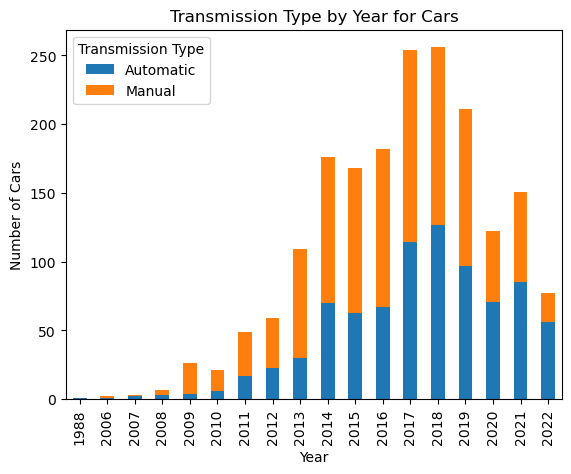

In [30]:
# Make dataframe
usedcars = pd.DataFrame(usedcars)

# Create dummy variables for each transmission type
usedcars_dummies = pd.get_dummies(usedcars['Transmission'])

# Concatenate the dummy variables with the original DataFrame
usedcars_stacked = pd.concat([usedcars['Year'], usedcars_dummies], axis=1)

# Group the data by Year and sum the transmission counts for each type
usedcars_stacked = usedcars_stacked.groupby('Year').sum().reset_index()

# Set 'Year' as the index for the DataFrame
usedcars_stacked.set_index('Year', inplace=True)

# Create a stacked bar chart
ax = usedcars_stacked.plot(kind='bar', stacked=True)

# Add labels and show the plot
plt.title('Transmission Type by Year for Cars')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(title='Transmission Type', loc='upper left')
plt.show()

#### Make a bargraph to see the trend of used cars sold by seat capacity across the years

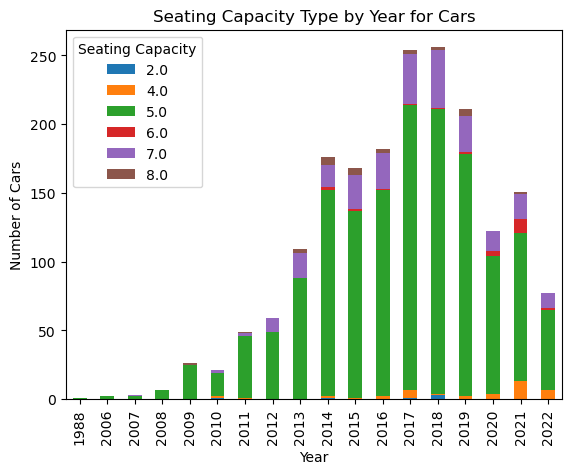

In [31]:
# Make dataframe
usedcars = pd.DataFrame(usedcars)

# Create dummy variables for each transmission type
usedcars_dummies = pd.get_dummies(usedcars['Seating Capacity'])

# Concatenate the dummy variables with the original DataFrame
usedcars_stacked = pd.concat([usedcars['Year'], usedcars_dummies], axis=1)

# Group the data by Year and sum the transmission counts for each type
usedcars_stacked = usedcars_stacked.groupby('Year').sum().reset_index()

# Set 'Year' as the index for the DataFrame
usedcars_stacked.set_index('Year', inplace=True)

# Create a stacked bar chart
ax = usedcars_stacked.plot(kind='bar', stacked=True)

# Add labels and show the plot
plt.title('Seating Capacity Type by Year for Cars')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(title='Seating Capacity', loc='upper left')
plt.show()

#### Is there a trend between mileage and price?

In [32]:
# grab the values from the dataset
kilometers = usedcars['Kilometer']
prices_INR = usedcars['Price']

We noticed that since the data is sourced from India, the currency and distance are not in the units that we understand in the United States. Thus we must convert INR to USD and kilometers to miles.

In [33]:
# Conversion function from kilometers to miles
def kilometers_to_miles(km):
    return km * 0.6213712

# Apply the conversion function to the DataFrame column
mileage = kilometers.apply(kilometers_to_miles)

In [34]:
# Conversion function from INR to USD
def INR_to_USD(inr):
    return inr * 0.012

# Apply the conversion function to the DataFrame column
prices_USD = prices_INR.apply(INR_to_USD)
prices_USD

0        6060.0
1        5400.0
2        2640.0
3        9588.0
4       23400.0
         ...   
2053     2940.0
2054    10200.0
2055     3300.0
2056     2880.0
2057    51480.0
Name: Price, Length: 1874, dtype: float64

Once converted to understandable units, we plot the relationship between price and mileage.

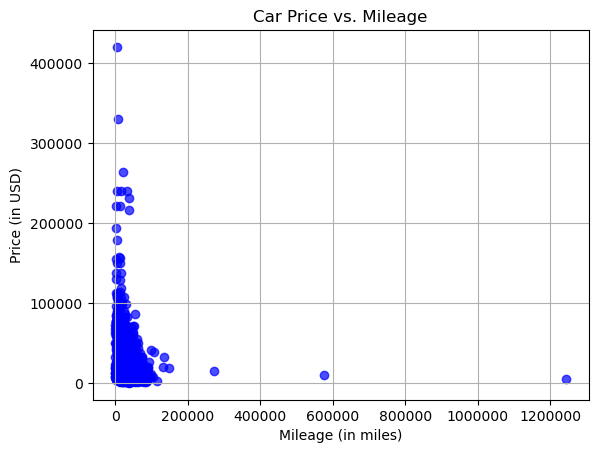

In [35]:
plt.scatter(mileage, prices_USD, c='blue', alpha=0.7)
plt.xlabel("Mileage (in miles)")
plt.ylabel("Price (in USD)")
plt.title("Car Price vs. Mileage")
plt.grid(True)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

Most cars are under 200,000 miles and cars with lower mileage sell for higher. For our model we may need to take the log of price and mileage because we have outliers. 


In [36]:
# quickly check the data type of the mileage variable
mileage.dtype


dtype('float64')

In [37]:
# quickly check the data type of the prices_USD variable
prices_USD.dtype

dtype('float64')

/Users/slimeollie/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


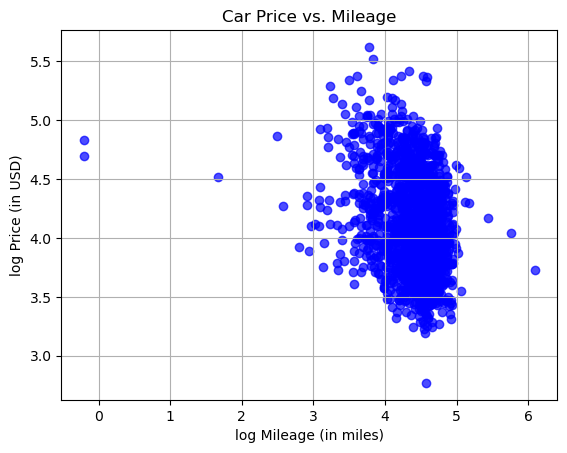

In [38]:
# generate a new scatter using log10(mileage) and log10(prices_USD)
plt.scatter(np.log10(mileage), np.log10(prices_USD), c='blue', alpha=0.7)
plt.xlabel("log Mileage (in miles)")
plt.ylabel("log Price (in USD)")
plt.title("Car Price vs. Mileage")
plt.grid(True)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

The clarity of the new plot seems to indicate that log values may be more useful in the model. We will experiment with log and regular values to determine the best way to organize the data in the model.

#### Create a heatmap to show associated numerical values

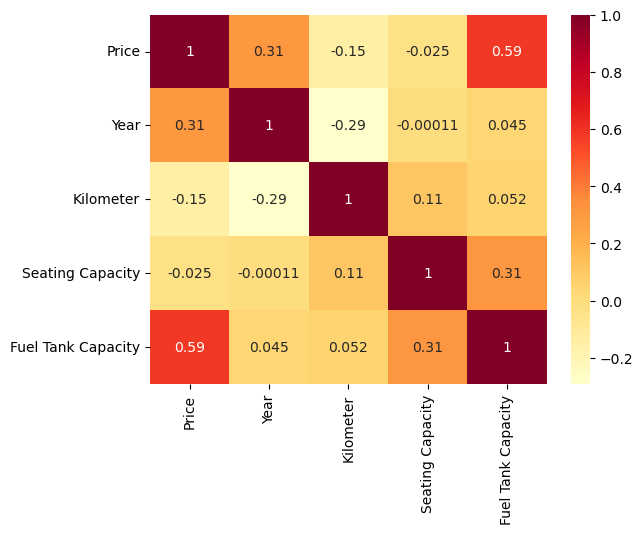

In [39]:
# Select some columns that might have a correlation
numerical_data = usedcars[['Price','Year','Kilometer', 'Seating Capacity', 'Fuel Tank Capacity']]
correlation_matrix = numerical_data.corr()

# Generate the heatmap and use a new color sheme
ax = sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd");
fig = ax.get_figure()

In [40]:
# check the lowest price car in the dataset
usedcars['Price'].min()

49000

## Effort Diary

Oliver:
- Proposal write-up 30%
- Dummy column creation 100%
- Creation of GitHub repository 100%

Frances:
- Proposal write-up 70%
- Data cleaning 100%
- Create example plots 50%

Heather:
- Create layout of Jupyter file 100%
- Upload data and examine details 100%
- Create example plots 50%